In [1]:
import pandas as pd

from mlxtend.frequent_patterns import apriori,association_rules

In [2]:
#df = pd.read_csv(r'C:\Users\Moushmi\EXR\Association Rule\groceries.csv')

groceries = []
# As the file is in transaction data we will be reading data directly 
with open("groceries.csv") as f:
    groceries = f.read()

In [3]:
groceries


'citrus fruit,semi-finished bread,margarine,ready soups,,,,,,,,,,,,,,,,,,,,,,,,,,,,\ntropical fruit,yogurt,coffee,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\nwhole milk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\npip fruit,yogurt,cream cheese ,meat spreads,,,,,,,,,,,,,,,,,,,,,,,,,,,,\nother vegetables,whole milk,condensed milk,long life bakery product,,,,,,,,,,,,,,,,,,,,,,,,,,,,\nwhole milk,butter,yogurt,rice,abrasive cleaner,,,,,,,,,,,,,,,,,,,,,,,,,,,\nrolls/buns,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\nother vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),,,,,,,,,,,,,,,,,,,,,,,,,,,\npot plants,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\nwhole milk,cereals,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\ntropical fruit,other vegetables,white bread,bottled water,chocolate,,,,,,,,,,,,,,,,,,,,,,,,,,,\ncitrus fruit,tropical fruit,whole milk,butter,curd,yogurt,flour,bottled water,dishes,,,,,,,,,,,,,,,,,,,,,,,\nbeef,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\nfrankfurter,rolls/buns,soda,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\nchicken,tropical fruit,,,,,,,,,,,,,

In [4]:
# splitting the data into separate transactions using separator as "\n"
groceries = groceries.split("\n")
groceries_list = []
for i in groceries:
    groceries_list.append(i.split(","))

In [5]:
groceries_list

[['citrus fruit',
  'semi-finished bread',
  'margarine',
  'ready soups',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['tropical fruit',
  'yogurt',
  'coffee',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['whole milk',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['pip fruit',
  'yogurt',
  'cream cheese ',
  'meat spreads',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product',
  '',
  '',
 

In [6]:
all_groceries_list = [i for item in groceries_list for i in item]
from collections import Counter
item_frequencies = Counter(all_groceries_list)
# after sorting
#item_frequencies = sorted(item_frequencies.items(),key = lambda x:x[1])
item_frequencies = sorted(item_frequencies.items(),key = lambda x:x[1])

In [7]:
# Storing frequencies and items in separate variables 
frequencies = list(reversed([i[1] for i in item_frequencies]))
items = list(reversed([i[0] for i in item_frequencies]))
items

['',
 'whole milk',
 'other vegetables',
 'rolls/buns',
 'soda',
 'yogurt',
 'bottled water',
 'root vegetables',
 'tropical fruit',
 'shopping bags',
 'sausage',
 'pastry',
 'citrus fruit',
 'bottled beer',
 'newspapers',
 'canned beer',
 'pip fruit',
 'fruit/vegetable juice',
 'whipped/sour cream',
 'brown bread',
 'domestic eggs',
 'frankfurter',
 'margarine',
 'coffee',
 'pork',
 'butter',
 'curd',
 'beef',
 'napkins',
 'chocolate',
 'frozen vegetables',
 'chicken',
 'white bread',
 'cream cheese ',
 'waffles',
 'salty snack',
 'long life bakery product',
 'dessert',
 'sugar',
 'UHT-milk',
 'berries',
 'hamburger meat',
 'hygiene articles',
 'onions',
 'specialty chocolate',
 'candy',
 'frozen meals',
 'misc. beverages',
 'oil',
 'butter milk',
 'specialty bar',
 'ham',
 'beverages',
 'meat',
 'ice cream',
 'sliced cheese',
 'hard cheese',
 'cat food',
 'grapes',
 'chewing gum',
 'red/blush wine',
 'detergent',
 'white wine',
 'pickled vegetables',
 'baking powder',
 'semi-finished

C:\Users\Moushmi\Anaconda3\lib\site-packages\matplotlib\__init__.py:1717: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


Text(0,0.5,'Counts')

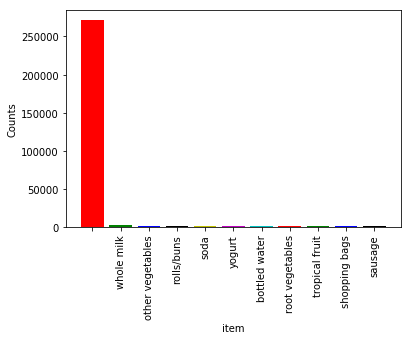

In [16]:
# barplot of top 10 

import matplotlib.pyplot as plt
#plt.subplot
plt.bar(height = frequencies[0:11],left = list(range(0,11)),color='rgbkymc')
plt.xticks(list(range(0,11),),items[0:11], rotation=90)
plt.xlabel("item")
plt.ylabel("Counts")

In [9]:
# Creating Data Frame for the transactions data 

# Purpose of converting all list into Series object Coz to treat each list element as entire element not to separate 
groceries_series  = pd.DataFrame(pd.Series(groceries_list))
groceries_series = groceries_series.iloc[:9835,:] # removing the last empty transaction

groceries_series.columns = ["transactions"]
groceries_series

,transactions
0,"[citrus fruit, semi-finished bread, margarine,..."
1,"[tropical fruit, yogurt, coffee, , , , , , , ,..."
2,"[whole milk, , , , , , , , , , , , , , , , , ,..."
3,"[pip fruit, yogurt, cream cheese , meat spread..."
4,"[other vegetables, whole milk, condensed milk,..."
...,...
9830,"[sausage, chicken, beef, hamburger meat, citru..."
9831,"[cooking chocolate, , , , , , , , , , , , , , ..."
9832,"[chicken, citrus fruit, other vegetables, butt..."
9833,"[semi-finished bread, bottled water, soda, bot..."


In [10]:
# creating a dummy columns for the each item in each transactions ... Using column names as item name
X = groceries_series['transactions'].str.join(sep='*').str.get_dummies(sep='*')

X

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
frequent_itemsets = apriori(X, min_support=0.005, max_len=3,use_colnames = True)

frequent_itemsets

,support,itemsets
0,0.008033,(Instant food products)
1,0.033452,(UHT-milk)
2,0.017692,(baking powder)
3,0.052466,(beef)
4,0.033249,(berries)
...,...,...
984,0.010473,"(soda, whole milk, yogurt)"
985,0.007931,"(tropical fruit, whipped/sour cream, whole milk)"
986,0.006202,"(whipped/sour cream, tropical fruit, yogurt)"
987,0.015150,"(tropical fruit, whole milk, yogurt)"


C:\Users\Moushmi\Anaconda3\lib\site-packages\matplotlib\__init__.py:1717: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


Text(0,0.5,'support')

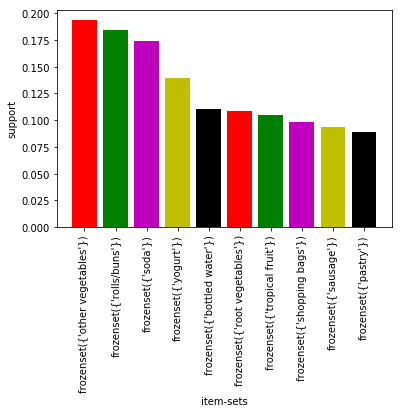

In [12]:
# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support',ascending = False,inplace=True)
plt.bar(left = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk');plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11], rotation = 90)
plt.xlabel('item-sets');plt.ylabel('support')


In [13]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending = False,inplace=True)


In [14]:
########################## To eliminate Redudancy in Rules #################################### 
def to_list(i):
    return (sorted(list(i)))


In [15]:
ma_X = rules.antecedants.apply(to_list)+rules.consequents.apply(to_list)


ma_X = ma_X.apply(sorted)

rules_sets = list(ma_X)

unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))


# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]

# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)


AttributeError: 'DataFrame' object has no attribute 'antecedants'